# Guided Project: Finding Heavy Traffic Indicators on I 94.ipynb

**The goal of our analysis is to determine a few indicators of heavy traffic on I-94. These indicators can be weather type, time of the day, time of the week, etc. For instance, we may find out that the traffic is usually heavier in the summer or when it snows.**

[Dataset Link](https://archive.ics.uci.edu/ml/datasets/Metro+Interstate+Traffic+Volume) 

## Data Set Information:

**Hourly Interstate 94 Westbound traffic volume for MN DoT ATR station 301, roughly midway between Minneapolis and St Paul, MN. Hourly weather features and holidays included for impacts on traffic volume.**

## Attribute Information:

`holiday` **Categorical US National holidays plus regional holiday, Minnesota State Fair**

`temp` **Numeric Average temp in kelvin**

`rain_1h` **Numeric Amount in mm of rain that occurred in the hour**

`snow_1h` **Numeric Amount in mm of snow that occurred in the hour**

`clouds_all` **Numeric Percentage of cloud cover**

`weather_main` **Categorical Short textual description of the current weather**

`weather_description` **Categorical Longer textual description of the current weather**

`date_time` **DateTime Hour of the data collected in local CST time**

`traffic_volume` **Numeric Hourly I-94 ATR 301 reported westbound traffic volume**

In [7]:
# import libraries that are needed 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# read in the file
path = '/DataQuest_Projects/data_files/'
i94_df = pd.read_csv(path + 'Metro_Interstate_Traffic_Volume.csv')

In [5]:
# confirm csv was loaded and check the first 5 and last 5 rows
i94_df

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918
...,...,...,...,...,...,...,...,...,...
48199,None,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
48200,None,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,None,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450


In [6]:
i94_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


<AxesSubplot: ylabel='Frequency'>

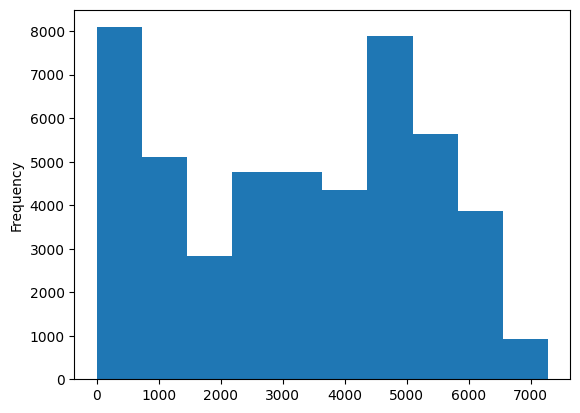

In [11]:
# create a histogram chart of the traffic volume
i94_df['traffic_volume'].plot.hist()

In [12]:
# generate stats for the traffic volume column
i94_df['traffic_volume'].describe()

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

In [13]:
# convert the datetime column from dtype - string to datetime
i94_df['date_time'] = pd.to_datetime(i94_df['date_time'])

In [15]:
# confirming the date_time column was converted to dtype datetime
i94_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   holiday              48204 non-null  object        
 1   temp                 48204 non-null  float64       
 2   rain_1h              48204 non-null  float64       
 3   snow_1h              48204 non-null  float64       
 4   clouds_all           48204 non-null  int64         
 5   weather_main         48204 non-null  object        
 6   weather_description  48204 non-null  object        
 7   date_time            48204 non-null  datetime64[ns]
 8   traffic_volume       48204 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(2), object(3)
memory usage: 3.3+ MB


In [17]:
# get the hour only from the datetime column
i94_df['date_time'].dt.hour

0         9
1        10
2        11
3        12
4        13
         ..
48199    19
48200    20
48201    21
48202    22
48203    23
Name: date_time, Length: 48204, dtype: int64

In [20]:
# split the data in daytime and nighttime
# Daytime data: hours from 7 a.m. to 7 p.m. (12 hours) 7 pm = 19 using 24 hour clock
i94_daytime_data = i94_df[i94_df['date_time'].dt.hour.between(7, 19)]

In [24]:
# confirming daytime data is split correctly
i94_daytime_data['date_time'].dt.hour.value_counts().sort_index()

7     2079
8     2080
9     2018
10    2078
11    1952
12    1955
13    1905
14    1969
15    1934
16    1988
17    1933
18    1986
19    1961
Name: date_time, dtype: int64

In [27]:
# Nighttime data: hours from 7 p.m. to 7 a.m. (12 hours) 
# using the ~(not) symbol will return the data not between 7 am to 7 pm 
i94_nighttime_data = i94_df[~i94_df['date_time'].dt.hour.between(7, 19)]

In [29]:
# confirming nighttime data is split correctly
i94_nighttime_data['date_time'].dt.hour.value_counts().sort_index()

0     2037
1     2049
2     2019
3     2025
4     2091
5     2063
6     2087
20    1979
21    1982
22    1994
23    2040
Name: date_time, dtype: int64

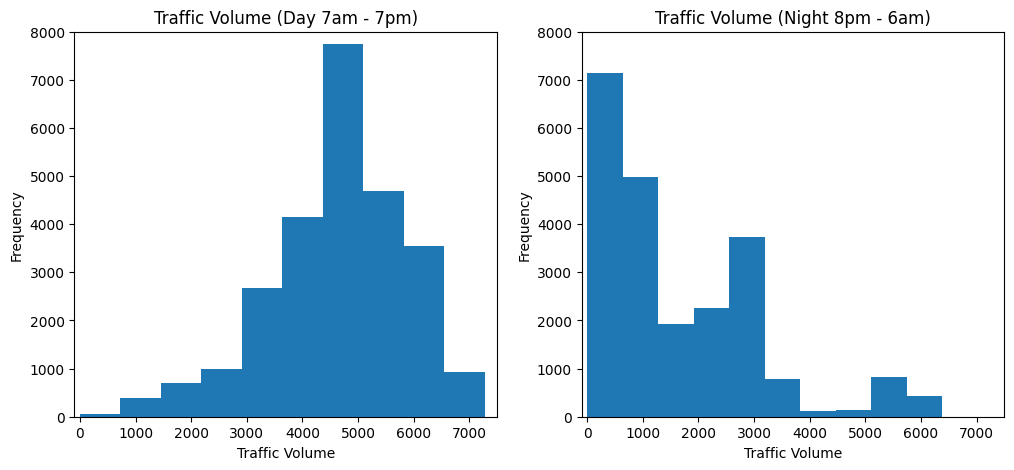

In [43]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
i94_daytime_data['traffic_volume'].plot.hist()
plt.title('Traffic Volume (Day 7am - 7pm)')
plt.ylim(0, 8000)
plt.xlim(-100, 7500)
plt.ylabel('Frequency')
plt.xlabel('Traffic Volume')

plt.subplot(1, 2, 2)
i94_nighttime_data['traffic_volume'].plot.hist()
plt.title('Traffic Volume (Night 8pm - 6am)')
plt.ylim(0, 8000)
plt.xlim(-100, 7500)
plt.ylabel('Frequency')
plt.xlabel('Traffic Volume')
plt.show()


In [46]:
# statistics for Daytime Volume
i94_daytime_data['traffic_volume'].describe()

count    25838.000000
mean      4649.292360
std       1202.321987
min          0.000000
25%       4021.000000
50%       4736.000000
75%       5458.000000
max       7280.000000
Name: traffic_volume, dtype: float64

In [47]:
# statistics for Nighttime Volume
i94_nighttime_data['traffic_volume'].describe()

count    22366.000000
mean      1654.648484
std       1425.175292
min          0.000000
25%        486.000000
50%       1056.500000
75%       2630.750000
max       6386.000000
Name: traffic_volume, dtype: float64

**Since the traffic during the night is light and our goal is to find indicators of heavy traffic we will only use the Daytime Data**

In [101]:
# create a column that shows the month 
i94_daytime_data['month'] = i94_daytime_data['date_time'].dt.month
by_month = i94_daytime_data.groupby('month').mean()
by_month['traffic_volume']

C:\Users\sean7\AppData\Local\Temp\ipykernel_19272\1625897064.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  i94_daytime_data['month'] = i94_daytime_data['date_time'].dt.month


month
1     4385.217310
2     4593.187798
3     4761.529676
4     4771.232816
5     4788.966639
6     4791.087488
7     4502.628360
8     4818.434690
9     4755.709916
10    4809.481678
11    4588.910486
12    4276.567081
Name: traffic_volume, dtype: float64

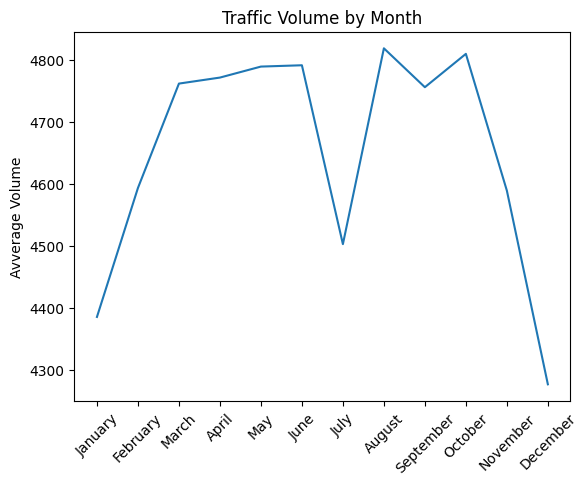

In [102]:
# generate a line chart for average volume by month
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

by_month['traffic_volume'].plot.line()
plt.title('Traffic Volume by Month')
plt.xticks(ticks=[1,2,3,4,5,6,7,8,9,10,11,12], labels=months, rotation=45)
plt.ylabel('Avverage Volume')
plt.xlabel('')
plt.show()

In [103]:
# generate a line chart for average volume by each day of the week
i94_daytime_data['day_of_week'] = i94_daytime_data['date_time'].dt.dayofweek
by_dayofweek = i94_daytime_data.groupby('day_of_week').mean()
by_dayofweek['traffic_volume'] #0 = monday and 6 = sunday

C:\Users\sean7\AppData\Local\Temp\ipykernel_19272\86336724.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  i94_daytime_data['day_of_week'] = i94_daytime_data['date_time'].dt.dayofweek


day_of_week
0    4746.208029
1    5036.062431
2    5141.231163
3    5163.688063
4    5161.533588
5    3884.065668
6    3410.368091
Name: traffic_volume, dtype: float64

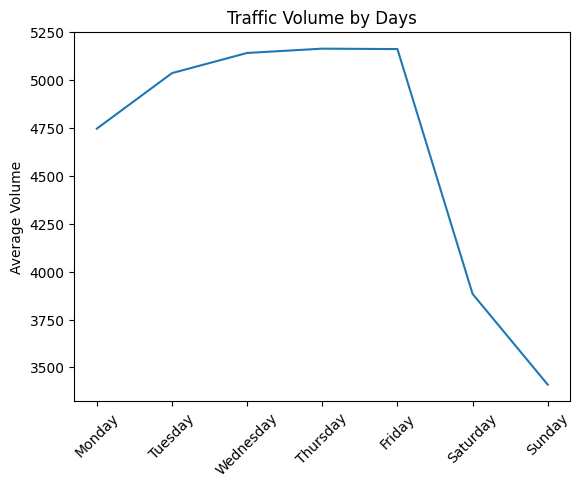

In [104]:
days_of_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

by_dayofweek['traffic_volume'].plot.line()
plt.title('Traffic Volume by Days')
plt.xticks(ticks=[0,1,2,3,4,5,6], labels=days_of_week, rotation=45)
plt.ylabel('Average Volume')
plt.xlabel('')
plt.show()

In [108]:
# create a hour column
i94_daytime_data['hour'] = i94_daytime_data['date_time'].dt.hour
# split the data into business days and weekend
business_days = i94_daytime_data.copy()[i94_daytime_data['day_of_week'] <= 4] # 4 is friday
weekend = i94_daytime_data.copy()[i94_daytime_data['day_of_week'] >= 5] # 5 is saturday
by_hour_businessday = business_days.groupby('hour').mean()
by_hour_weekend = weekend.groupby('hour').mean()

print(by_hour_businessday['traffic_volume'])
print(by_hour_weekend['traffic_volume'])

hour
7     6030.413559
8     5503.497970
9     4895.269257
10    4378.419118
11    4633.419470
12    4855.382143
13    4859.180473
14    5152.995778
15    5592.897768
16    6189.473647
17    5784.827133
18    4434.209431
19    3298.340426
Name: traffic_volume, dtype: float64
hour
7     1589.365894
8     2338.578073
9     3111.623917
10    3686.632302
11    4044.154955
12    4372.482883
13    4362.296564
14    4358.543796
15    4342.456881
16    4339.693805
17    4151.919929
18    3811.792279
19    3220.234120
Name: traffic_volume, dtype: float64


C:\Users\sean7\AppData\Local\Temp\ipykernel_19272\3153410177.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  i94_daytime_data['hour'] = i94_daytime_data['date_time'].dt.hour


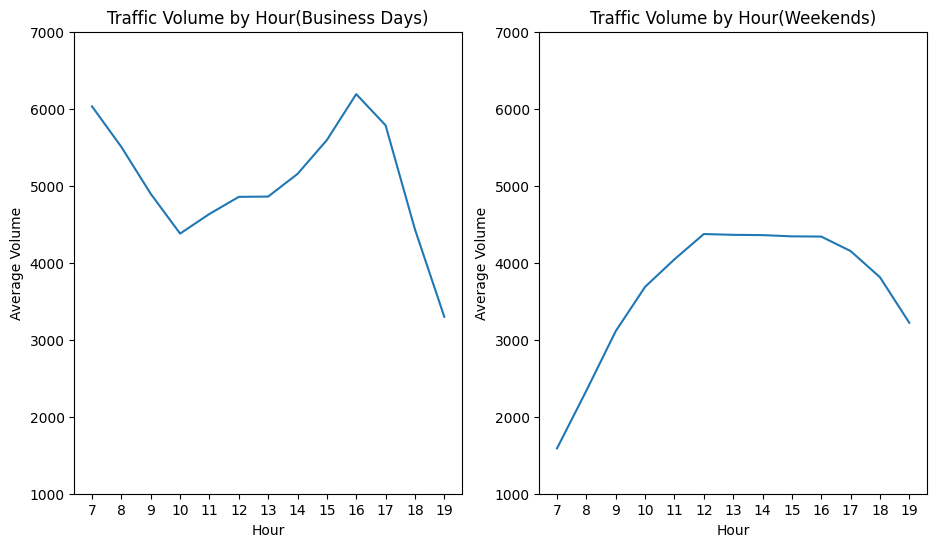

In [124]:
plt.figure(figsize=(11, 6))
plt.subplot(1, 2, 1)
by_hour_businessday['traffic_volume'].plot.line()
plt.title('Traffic Volume by Hour(Business Days)')
plt.xticks(ticks=[7,8,9,10,11,12,13,14,15,16,17,18,19])
plt.ylim([1000, 7000])
plt.xlabel('Hour')
plt.ylabel('Average Volume')

plt.subplot(1, 2, 2)
by_hour_weekend['traffic_volume'].plot.line()
plt.title('Traffic Volume by Hour(Weekends)')
plt.xticks(ticks=[7,8,9,10,11,12,13,14,15,16,17,18,19])
plt.ylim([1000, 7000])
plt.xlabel('Hour')
plt.ylabel('Average Volume')

plt.show()

In [162]:
i94_daytime_data.loc[:,['temp', 'rain_1h', 'snow_1h', 'clouds_all']].corrwith(i94_daytime_data['traffic_volume'])

temp          0.118084
rain_1h       0.004020
snow_1h       0.003768
clouds_all   -0.033410
dtype: float64

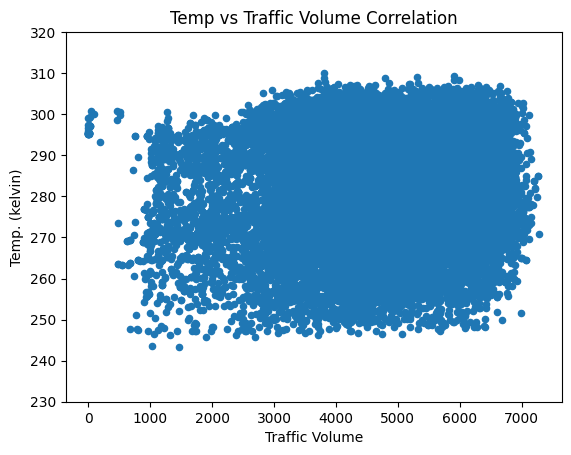

In [176]:
# we see that temp has the highest correllation with traffic volume so let's display a scatter chart showing this relationship 
i94_daytime_data.plot.scatter(x='traffic_volume', y='temp')
plt.ylim(230, 320) # get rid of the outliers
plt.ylabel('Temp. (kelvin)')
plt.xlabel('Traffic Volume')
plt.title('Temp vs Traffic Volume Correlation')
plt.show()

**We Can conclude that the following:**

`temp          0.118084`
`rain_1h       0.004020`
`snow_1h       0.003768`
`clouds_all   -0.033410`

**don't really have an effect on traffic volume**

In [185]:
# let's look at the catagorical columns
by_weather_main = i94_daytime_data.groupby('weather_main').mean()
by_weather_description = i94_daytime_data.groupby('weather_description').mean()

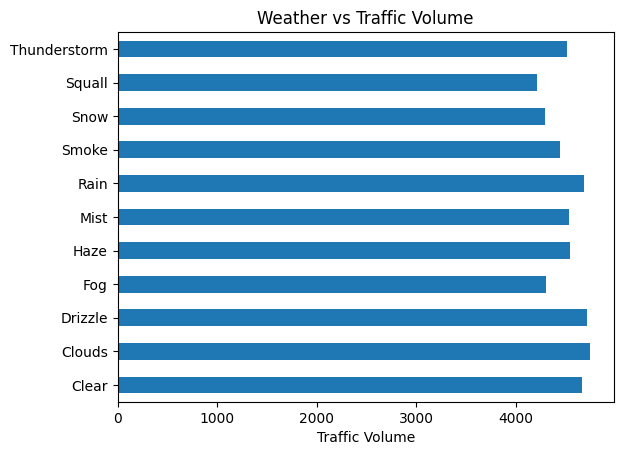

In [195]:
by_weather_main['traffic_volume'].plot.barh()
plt.title('Weather vs Traffic Volume')
plt.ylabel('')
plt.xlabel('Traffic Volume')
plt.show()

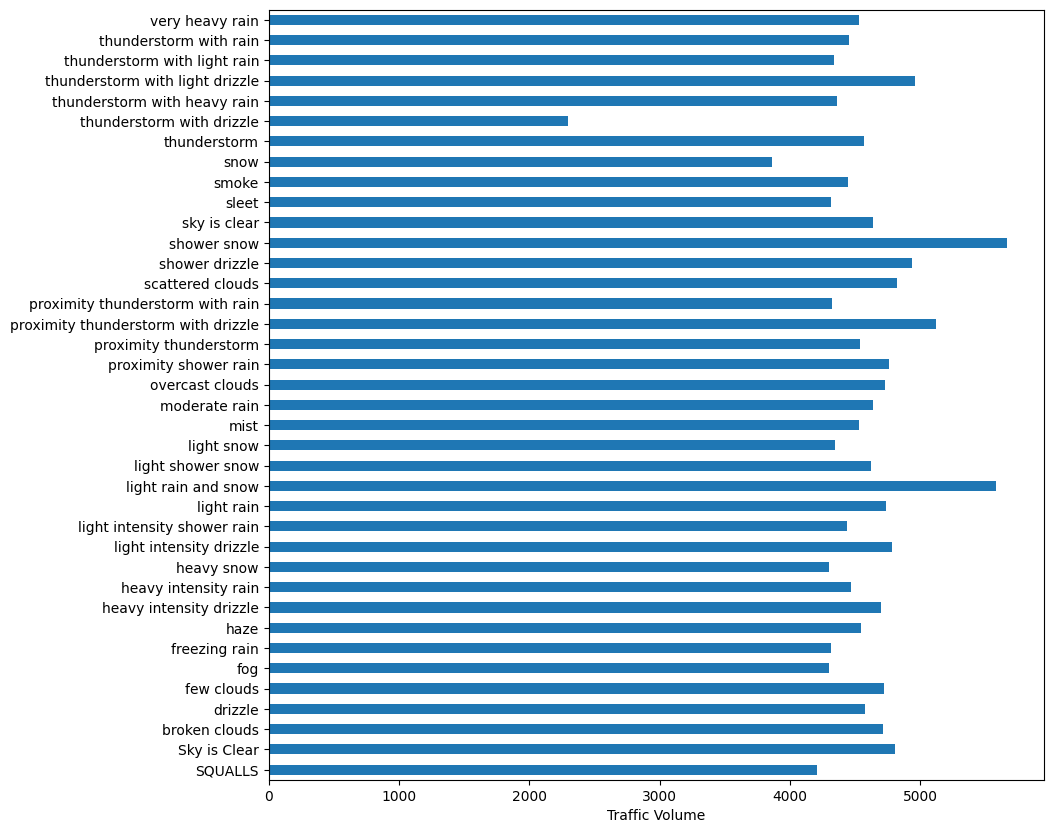

In [199]:
by_weather_description['traffic_volume'].plot.barh(figsize= (10, 10))
plt.ylabel('')
plt.xlabel('Traffic Volume')
plt.show()

**It look like `shower snow` and `light rain and snow` are the 2 indicators that show more traffic volume exceeding 5000**

# Conclusion

**Our goal was to find indicators that would tell us when heavier traffic is more likly to occur.** 

**We found that time based indicators provide better indication of traffic volume:**

**Time Indicators:** 

- warmer months show a higher traffic volume 
- bussiness days also show a higher traffic volume
- rush hour are 7am and 4pm
    
**Weather indicators:**

- shower snow shows higher traffic volume exceeding 5000 
- light rain and snow shows higher traffic volume exceeding 5000

